# OLD PHOTOS CLASSIFIER

## Importing Libraries

In [7]:
import pandas as pd
import cv2
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Creating the train and test dataset

### Function for image data preproccessing

In [8]:
def importing_image_data(path, label):
    x = []
    y = []
    for img_name in os.listdir(path):
        if 'spate' in img_name:
            continue
        img = cv2.imread(path + '\\' + img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img / 255
        x.append(img)
        y.append(label)
    
    return np.array(x), np.array(y)

### Preproccessing the black and white and color images seperately

In [9]:
x_black_and_white, y_black_and_white = importing_image_data("D:\\Imagini\\Alb_Negru", 0)
x_color, y_color = importing_image_data("D:\\Imagini\\Color", 1)

x_black_and_white.shape, y_black_and_white.shape, x_color.shape, y_color.shape

((261, 224, 224, 3), (261,), (70, 224, 224, 3), (70,))

### Equaling the number of black and white images to the number of color images

In [10]:
x_black_and_white, y_black_and_white = x_black_and_white[:70], y_black_and_white[:70]

x_black_and_white.shape, y_black_and_white.shape, x_color.shape, y_color.shape

((70, 224, 224, 3), (70,), (70, 224, 224, 3), (70,))

### Creating a test and train set for black and white and color images seperately

In [11]:
x_black_and_white_train, x_black_and_white_test, y_black_and_white_train, y_black_and_white_test = train_test_split(x_black_and_white, y_black_and_white, test_size = 0.1, random_state = 42)
x_color_train, x_color_test, y_color_train, y_color_test = train_test_split(x_color, y_color, test_size=0.1, random_state=42)

print(x_black_and_white_train.shape, x_black_and_white_test.shape, y_black_and_white_train.shape, y_black_and_white_test.shape)
print(x_color_train.shape, x_color_test.shape, y_color_train.shape, y_color_test.shape)

(63, 224, 224, 3) (7, 224, 224, 3) (63,) (7,)
(63, 224, 224, 3) (7, 224, 224, 3) (63,) (7,)


### Combining the test and train sets

In [12]:
x_train = np.vstack((x_black_and_white_train, x_color_train))
x_test = np.vstack((x_black_and_white_test, x_color_test))
y_train = np.hstack((y_black_and_white_train, y_color_train))
y_test = np.hstack((y_black_and_white_test, y_color_test))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((126, 224, 224, 3), (14, 224, 224, 3), (126,), (14,))

## Model Configuration

### Building the model

In [15]:
model = Sequential()

model.add(Flatten(input_shape = (224, 224, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 256)               38535424  
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 38578689 (147.17 MB)
Trainable params: 3

### Training the model

In [16]:
model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), batch_size=10)

Epoch 1/10
13/13 [==============================] - 18s 1s/step - loss: 12.3027 - accuracy: 0.5397 - val_loss: 2.6315 - val_accuracy: 0.7143
Epoch 2/10
13/13 [==============================] - 11s 825ms/step - loss: 4.4163 - accuracy: 0.6825 - val_loss: 11.5181 - val_accuracy: 0.5000
Epoch 3/10
13/13 [==============================] - 10s 792ms/step - loss: 5.7402 - accuracy: 0.6429 - val_loss: 2.3407 - val_accuracy: 0.8571
Epoch 4/10
13/13 [==============================] - 11s 821ms/step - loss: 4.3530 - accuracy: 0.6984 - val_loss: 6.4523 - val_accuracy: 0.7143
Epoch 5/10
13/13 [==============================] - 10s 801ms/step - loss: 1.6938 - accuracy: 0.8651 - val_loss: 2.9401 - val_accuracy: 0.7857
Epoch 6/10
13/13 [==============================] - 10s 791ms/step - loss: 0.5021 - accuracy: 0.8810 - val_loss: 1.7750 - val_accuracy: 0.7143
Epoch 7/10
13/13 [==============================] - 11s 843ms/step - loss: 0.7061 - accuracy: 0.8730 - val_loss: 2.8844 - val_accuracy: 0.7857


### Evaluating the model

1/1 [==============================] - 1s 569ms/step


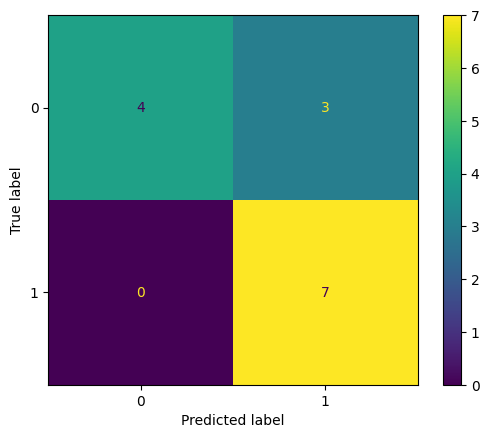

In [17]:
predicted = model.predict(x_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

#### ! NOT FINAL MODEL !